# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Understanding Of Dataset**

age - age of the person at the time of operation.

operation_Year - patient's year of operation.

axil_nodes - implies whether cancer affected the lymph node,if it is positive node cancer has been spread to lymph nodes.

survival_status - 1 = the patient survived 5 years or longer.
     2 = the patient died within 5 year.

### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [21]:
print(df.shape)
print(df.shape[0])

(306, 4)
306


**Objective** : There are total 306 rows and 4 columns

In [22]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


**Objective** - 3 input clumns and 1 output column.

In [23]:
print(df['status'].nunique())
print(df['status'].unique())

2
[1 2]


**Observation** - Binary output is there

In [24]:
print(df['status'].value_counts())


1    225
2     81
Name: status, dtype: int64


**Observation** - This data is imbalanced

In [25]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Observation :** whole data set is numerical

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

1) The objective is to analyse data to find out which factor influences the survival status of the people.

2) To study and understand all the columns of the database.

3) To study each and every data point with different plots.

4) To observe and conclude the pattern of data give in the database.

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

<h3>2D scatter plot

<Figure size 432x288 with 0 Axes>

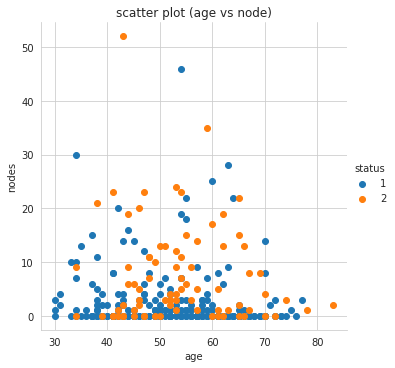

In [27]:

plt.figure()
sns.set_style("whitegrid")
a=sns.FacetGrid(df,hue="status",size=5)
a.map(plt.scatter,'age','nodes')
plt.title("scatter plot (age vs node)")
a.add_legend()

**Observation**: Data is randomly scattered

<h3>Pair Plot

In [28]:

%matplotlib inline


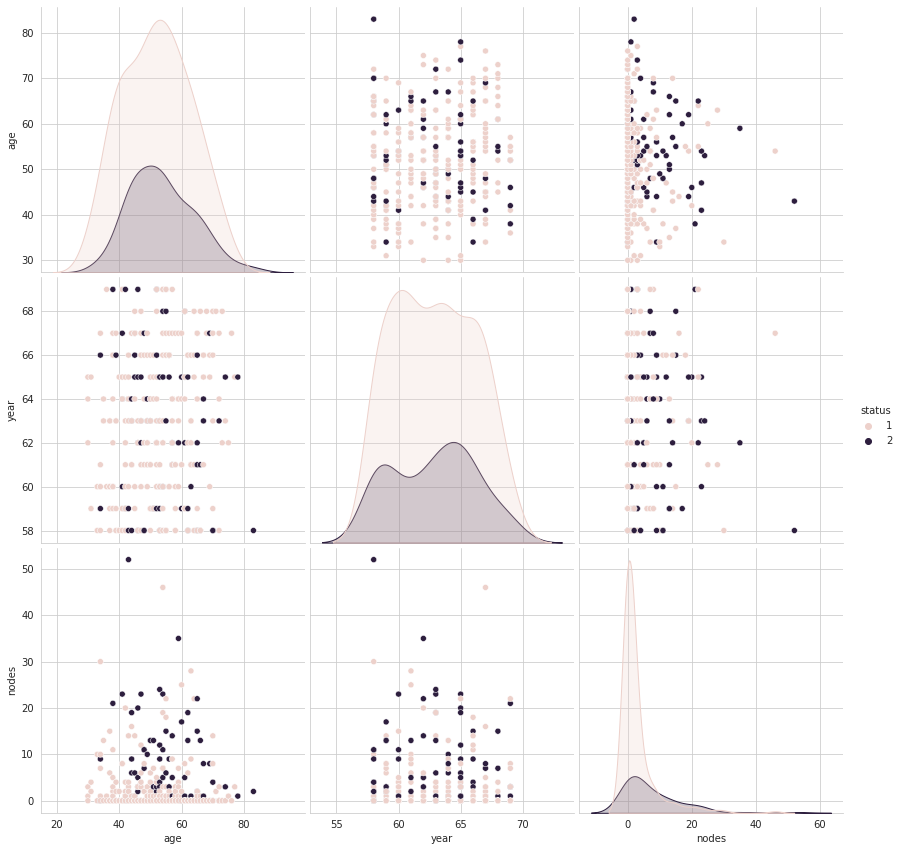

In [32]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df, hue="status",vars = ['age', 'year', 'nodes'], size = 4)
plt.show()

**Observation:** Plot between nodes and age is very understandable. 

Most of the patient who survived have no positive lymph nodes.

<h3>Histogram

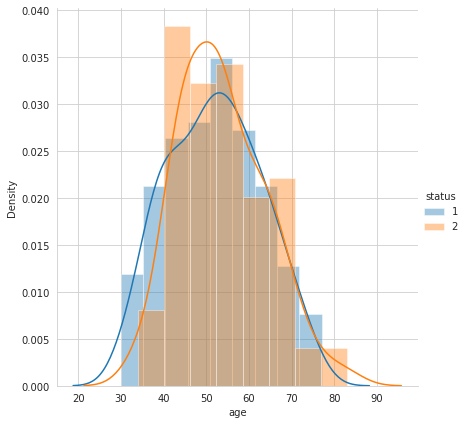

In [33]:
plt.close()

sns.FacetGrid(df, hue="status", size = 6) \
.map(sns.distplot,"age") \
.add_legend();

plt.show()

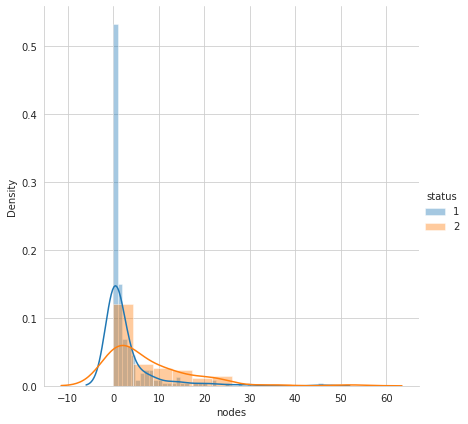

In [34]:
plt.close()

sns.FacetGrid(df, hue="status", size = 6) \
.map(sns.distplot,"nodes") \
.add_legend();

plt.show()

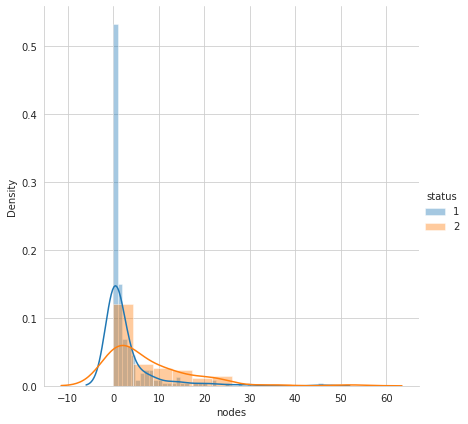

In [35]:
plt.close()

sns.FacetGrid(df, hue="status", size = 6) \
.map(sns.distplot,"nodes") \
.add_legend();

plt.show()

**Observation:** Histogram of nodes shows that most of the patients who survived for 5 or more years had no positive node.

<h3>PDF & CDF

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


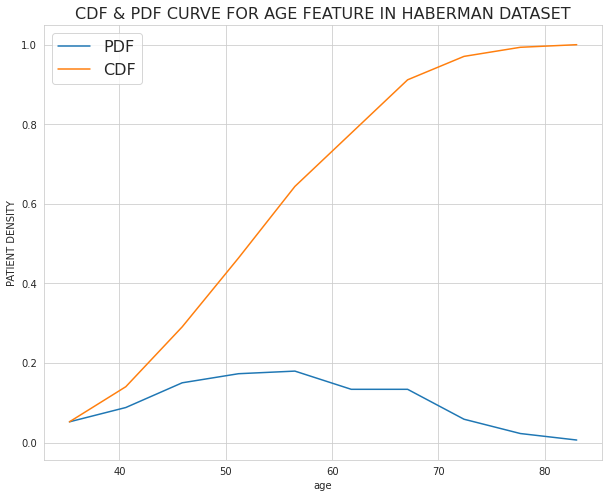

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(xlabel = 'age',ylabel = 'PATIENT DENSITY');

counts, bin_edges = np.histogram(df['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
pdf_p,=plt.plot(bin_edges[1:],pdf,label='PDF')
cdf_p,=plt.plot(bin_edges[1:], cdf,label='CDF')

plt.legend(fontsize=16)
plt.title("CDF & PDF CURVE FOR AGE FEATURE IN HABERMAN DATASET",fontsize=16)

plt.show();

**Observation:** More number of patients in the age group of 50 to 60.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


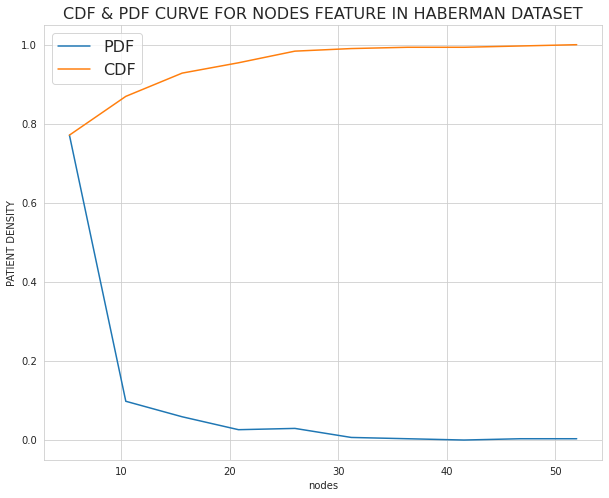

In [45]:
plt.figure(figsize=(10,8))
plt.subplot(xlabel = 'nodes',ylabel = 'PATIENT DENSITY');

counts, bin_edges = np.histogram(df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
pdf_p,=plt.plot(bin_edges[1:],pdf,label='PDF')
cdf_p,=plt.plot(bin_edges[1:], cdf,label='CDF')

plt.legend(fontsize=16)
plt.title("CDF & PDF CURVE FOR NODES FEATURE IN HABERMAN DATASET",fontsize=16)

plt.show();

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


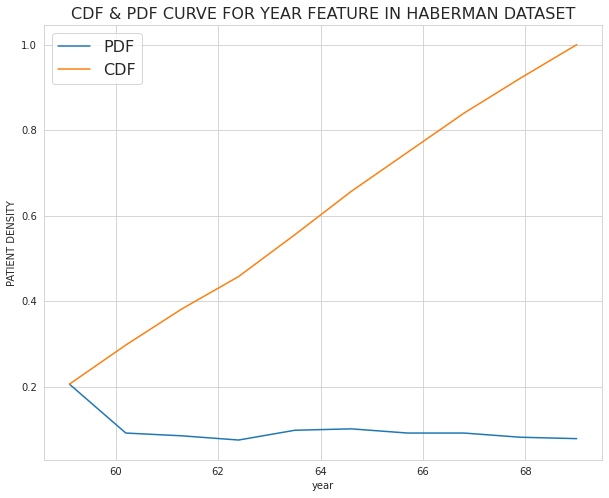

In [46]:
plt.figure(figsize=(10,8))
plt.subplot(xlabel = 'year',ylabel = 'PATIENT DENSITY');

counts, bin_edges = np.histogram(df['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
pdf_p,=plt.plot(bin_edges[1:],pdf,label='PDF')
cdf_p,=plt.plot(bin_edges[1:], cdf,label='CDF')

plt.legend(fontsize=16)
plt.title("CDF & PDF CURVE FOR YEAR FEATURE IN HABERMAN DATASET",fontsize=16)

plt.show();

<h3>Box plot

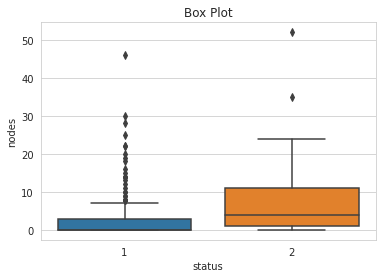

In [39]:
sns.boxplot(x="status", y="nodes", data =df,)
plt.title("Box Plot")
plt.show()

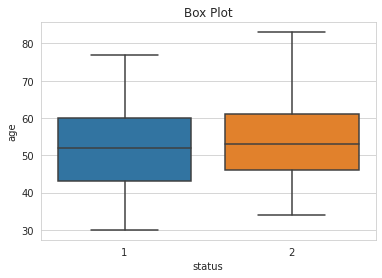

In [40]:
sns.boxplot(x="status", y="age", data =df,)
plt.title("Box Plot")
plt.show()

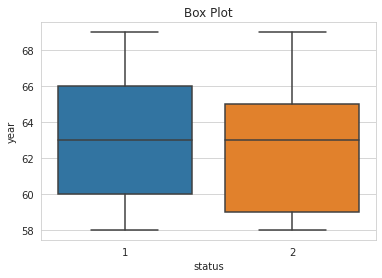

In [41]:
sns.boxplot(x="status", y="year", data =df,)
plt.title("Box Plot")
plt.show()

**Observation:** In these 3 box plots, box plot of year and age does not gives us any sure information.

but box plot of nodes gives us a bit information about the survival status of patients.

<h3>violin plot

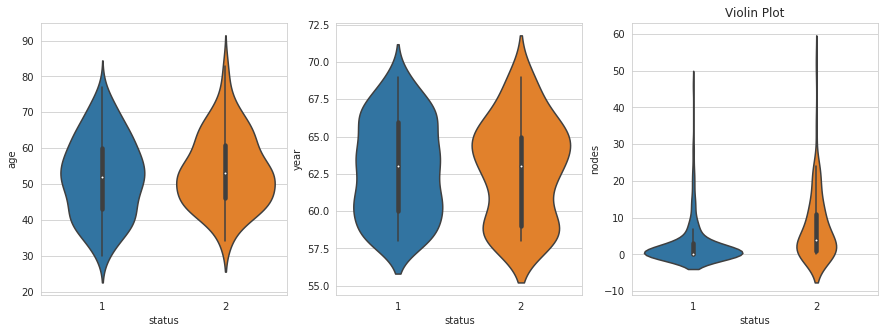

In [44]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

for idx, feature in enumerate(list(df.columns)[:-1]):
  sns.violinplot(x="status", y=feature,data=df, ax=axes[idx])
  plt.title("Violin Plot") 
plt.show()

**Observations:**1) Patients with more than 1 nodes are not likely to survive.

2)More the number of nodes, lesser the survival chances.

3)The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

#Final conclusion

1) All the columns are of the integer data type.

2)The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced. 3)The axil nodes of patients who survived are less when compared to patients who did not survive.

4)The nodes of patients who survived are less when compared to patients who did not survive.

5)people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.

6)'age' & 'year' feature do not help in classification using univariate analysisa because of overlapping.

7)Most of the patients have undergone for the operation between the age 40 to 60 years old.